<a href="https://colab.research.google.com/github/Thrishankkuntimaddi/Data-Structures-and-Algorithms-Advanced/blob/main/19.1%20Dynamic%20Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Programming

In simple words, it is an optimization over plan recursion. The idea is to reuse the solution of subproblem when there are overlapping subproblem.

1. memoization (Top down)
2. Tabulation (Bootom up)

### Applications

1. Bellman Ford Algorithm
2. Floyd Warshall Algorithm
3. Diff utility (LCS : Longest Common Subsequence)
4. Search cloud Words (Edit Distanct)
5. Resource Allocation (0-1 Knapsack)


# Memoization

Example : Fibonacci Numbers

I/P : n = 3

O/P : 2

In [2]:
# Implementation

def fib(n):
  if n == 0 or n == 1:
    return n

  return fib(n-1) + fib(n-2)

fib(3)

# Time Complexity : O(O^n)

2

-> A Simple Recursive solution with exponential time complexity

-> we are going to optimize it using memoization

## Observations on the above Recursion Tree

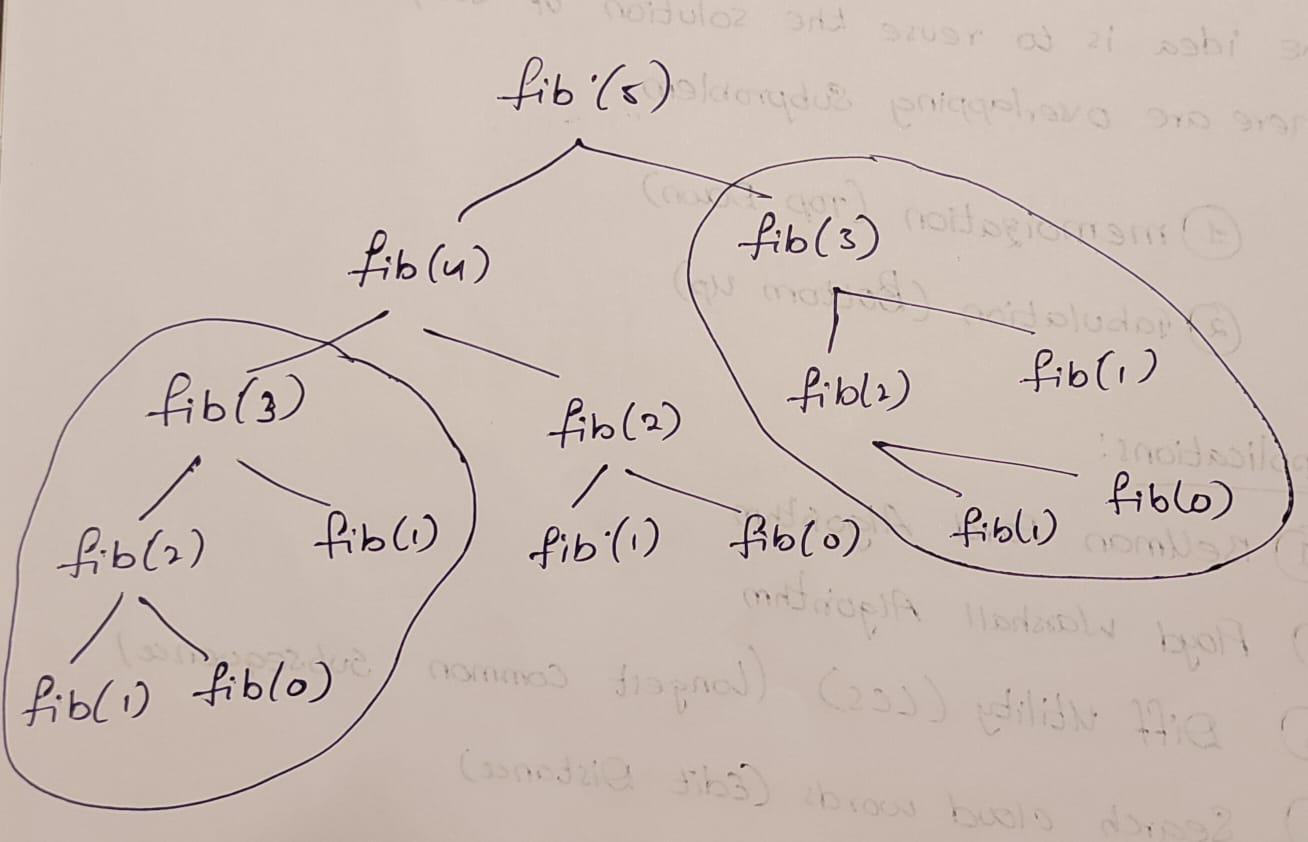

-> we solve some subproblems again : fib(3) : 2 Times; fib(2) : 3 times

-> Memoization Idea : Store solutions and before proceeding further, check if already completed


NOTE : So that we have 2n-1 function calls now

In [3]:
# DP Solution

memo = [None] * 100

def fib(n):
  if memo[n] != None:
    return memo[n]

  if n == 0 or n == 1:
    memo[n] = n
  else:
    memo[n] = fib(n-1) + fib(n-2)

  return memo[n]

fib(3)

2

# Tabulation : A Bottom-Up Way

In [4]:
# Implementation

def fib(n):
  dp = [None] * (n+1)
  dp[0] = 0
  dp[1] = 1

  for i in range(2, n+1):
    dp[i] = dp[i-1] + dp[i-2]

  return dp[n]

fib(3)

# Time Complexity : θ(n)

2

# Longest Common Subsequence

I/P : s1 = "ABCDGH"; s2 = "AEDFHR"

O/P : 3

I/P : s1 = "xyz"; s2 = "xyz"

O/P : 3

In [7]:
# Recursion

def lcsR(s1, s2, n, m):
  if m == 0 or n == 0:
    return 0

  if s1[n-1] == s2[m-1]:
    return 1 + lcsR(s1, s2, n-1, m-1)
  else:
    return max(lcsR(s1, s2, n, m-1), lcsR(s1, s2, n-1, m))

s1 = "ABCDGH"
s2 = "AEDFHR"
lcsR(s1, s2, len(s1), len(s2))

# Time Complexity : O(2^n)

3

In [8]:
# Memoization

M = 1000
N = 1000

memo = [[-1] * N for i in range(M)]

def lcsM(s1, s2, n, m):
  if memo[n][m] != -1:
    return memo[n][m]

  if n == 0 or m == 0:
    memo[n][m] = 0
  else:
    if s1[n-1] == s2[m-1]:
      memo[n][m] = 1 + lcsM(s1, s2, n-1, m-1)
    else:
      memo[n][m] = max(lcsM(s1, s2, n, m-1), lcsM(s1, s2, n-1, m))

  return memo[n][m]

s1 = "ABCDGH"
s2 = "AEDFHR"
lcsM(s1, s2, len(s1), len(s2))

# Time Complexity : θ(mn)

3

In [13]:
# Tabulation

def lcsT(s1, s2):
  m = len(s1)
  n = len(s2)

  dp = [[0 for j in range(n + 1)] for i in range(m + 1)]

  for i in range(1, m + 1):
    for j in range(1, n + 1):
      if s1[i - 1] == s2[j - 1]:
        dp[i][j] = 1 + dp[i - 1][j - 1]
      else:
        dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

  return dp[m][n]

s1 = "ABCDGH"
s2 = "AEDFHR"
lcsT(s1, s2)

# Time Complexity : θ(mn)

3

    Variations of LCS

        1. Diff Utility
        2. minimum insertions and deletions to convert s1 into s2
        3. shortest common super sequence
        4. Longest Palindrome subsequence
        5. Longest Repeating subsequence
        6. Space Optimized DP solution of LCS
        7. Printing LCS



# Coin Change

I/P : coins = [1, 2, 3]

O/P : 4 ==> [1+1+1+1, 2+2, 1+3, 2+1+1]

    Idea for the Recursive solution

        coins = x0, x1, x2, ...... xn-1]
        sum = s

        we consider Two choices for every coin
        -> Included
        -> Not Included

        we return sum of the results of the Recursive calls
  

In [16]:
# Recursive

def countWays(coin, n, s):
    if s == 0:
        return 1

    if s < 0:
        return 0

    if n == 0:
        return 0

    return countWays(coin, n, s - coin[n - 1]) + countWays(coin, n - 1, s)


coin = [1, 2, 3]
s = 4
n = len(coin)
result = countWays(coin, n, s)
print(result)

# Time Complexity : O(n * s)

4


In [17]:
# Tabulation

def countWaysDP(coin, s):
    n = len(coin)

    dp = [[0 for _ in range(s + 1)] for _ in range(n + 1)]

    for i in range(n + 1):
        dp[i][0] = 1

    for i in range(1, n + 1):
        for j in range(1, s + 1):
            dp[i][j] = dp[i - 1][j]

            if j >= coin[i - 1]:
                dp[i][j] += dp[i][j - coin[i - 1]]

    return dp[n][s]

coin = [1, 2, 3]
s = 4
result = countWaysDP(coin, s)
print(result)

# Time Complexity : θ(n * s)
# Space Complexity : θ(n * s)

4


# Edit Distance

I/P : s1 = "CAT"; s2 = "CUT"

O/P : 1

In [19]:
# Recursive

def ed(s1, s2, m, n):
  if m == 0:
    return n

  if n == 0:
    return m

  if s1[m-1] == s2[m-1]:
    return ed(s1, s2, m-1, n-1)
  else:
    return 1 + min(ed(s1, s2, m, n-1), ed(s1, s2, m-1, n), ed(s1, s2, m-1, n-1))

s1 = "CAT"
s2 = "CUT"
ed(s1, s2, len(s1), len(s2))

# Time Complexity : O(3^max(m,n))

1

In [20]:
# Tabulation

def edDP(s1, s2, m, n):
  dp = [[0] * (n + 1) for i in range(m+1)]

  for i in range(m+1):
    dp[i][0] = i

  for j in range(n+1):
    dp[0][j] = j

  for i in range(1, m+1):
    for j in range(1, n+1):
      if s1[i-1] == s2[j-1]:
        dp[i][j] = dp[i-1][j-1]
      else:
        dp[i][j] = 1 + min(dp[i][j-1], dp[i-1][j], dp[i-1][j-1])

  return dp[m][n]

s1 = "CAT"
s2 = "CUT"
edDP(s1, s2, len(s1), len(s2))

# Time Complexity : θ(mn)

1

# Longest Increasing Subsequence

I/P : arr = [3, 4, 2, 8, 10]

O/P : 4

In [22]:
# DP Solution

def LIS(arr):
  n = len(arr)
  lis = [1] * n

  for i in range(1, n):
    for j in range(0, i):
      if arr[i] > arr[j]:
        lis[i] = max(lis[i], lis[j] + 1)

  res = lis[0]

  for i in range(n):
    res = max(lis[i], res)

  return res

arr = [3, 4, 2, 8, 10]
LIS(arr)

# Time Complexity : θ(n^2)
# Space Complexity : θ(n)

4

# Longest Increasing Subsequence in O(n logn)

I/P : arr = [8, 100, 150, 10, 12, 14, 110]

O/P : 5

tail[i] = stores the minimum possible tail value for LIS of length(i+1)

In [26]:
# DP Solution

def LISDP(arr):
  n = len(arr)
  tail = [arr[0]]

  for i in range(1, n):
    if arr[i] > tail[-1]:
      tail.append(arr[i])
    else:
      c = ceilIDK(tail, arr[i])
      tail[c] = arr[i]

  return len(tail)

def ceilIDK(tail, u):
  l = 0
  r = len(tail) - 1

  while r > l:
    m = (l + (r-l)) // 2
    if tail[m] >= u:
      r = m
    else:
      l = m + 1

  return r

arr = [3, 4, 2, 8, 10]
LISDP(arr)

# Time Complexity : O(n logn)
# Space Complexity : O(n)

4

# Variations of LIS

    1. Minimum deletions to make an array sorted
    2. Maximum sum increasing subsequence
    3. Maximum length Bitonic subsequence
    4. Building Bridges
    5. The longest chain

In [27]:
# Minimum deletions to make an array sorted

def minDeletionsToSort(arr):
    n = len(arr)
    lis = [1] * n

    for i in range(1, n):
        for j in range(i):
            if arr[i] > arr[j] and lis[i] < lis[j] + 1:
                lis[i] = lis[j] + 1

    return n - max(lis)

arr = [4, 3, 2, 6, 7, 8]
print(minDeletionsToSort(arr))

# Time Complexity : O(n^2)

2


In [28]:
# Maximum Sum Increasing Subsequence

def maxSumIncreasingSubsequence(arr):
    n = len(arr)
    msis = arr[:]

    for i in range(1, n):
        for j in range(i):
            if arr[i] > arr[j] and msis[i] < msis[j] + arr[i]:
                msis[i] = msis[j] + arr[i]

    return max(msis)


arr = [1, 101, 2, 3, 100, 4, 5]
print(maxSumIncreasingSubsequence(arr))

# Time Complexity : O(n^2)

106


In [29]:
# Maximum Length Bitonic Subsequence

def maxLengthBitonicSubsequence(arr):
    n = len(arr)

    lis = [1] * n
    for i in range(1, n):
        for j in range(i):
            if arr[i] > arr[j] and lis[i] < lis[j] + 1:
                lis[i] = lis[j] + 1

    lds = [1] * n
    for i in range(n-2, -1, -1):
        for j in range(i+1, n):
            if arr[i] > arr[j] and lds[i] < lds[j] + 1:
                lds[i] = lds[j] + 1

    max_length = 0
    for i in range(n):
        max_length = max(max_length, lis[i] + lds[i] - 1)

    return max_length

arr = [1, 11, 2, 10, 4, 5, 2, 1]
print(maxLengthBitonicSubsequence(arr))

# Time Complexity : O(n^2)

6


In [30]:
# Building Bridges

def buildingBridges(pairs):
    pairs.sort(key=lambda x: (x[0], x[1]))

    second_coordinate = [p[1] for p in pairs]

    n = len(second_coordinate)
    lis = [1] * n

    for i in range(1, n):
        for j in range(i):
            if second_coordinate[i] > second_coordinate[j] and lis[i] < lis[j] + 1:
                lis[i] = lis[j] + 1

    return max(lis)

pairs = [(8, 1), (1, 2), (4, 3), (3, 4), (6, 5), (5, 6)]
print(buildingBridges(pairs))

# Time Complexity : O(n^2)

3


In [31]:
# The Longest Chain

def longestChain(pairs):
    pairs.sort()

    n = len(pairs)
    dp = [1] * n

    for i in range(1, n):
        for j in range(i):
            if pairs[i][0] > pairs[j][1] and dp[i] < dp[j] + 1:
                dp[i] = dp[j] + 1

    return max(dp)

pairs = [(5, 24), (15, 25), (27, 40), (50, 60)]
print(longestChain(pairs))

# Time Complexity : O(n^2)

3


# Minimum coins to make a value

I/P : coin : [25, 10, 5]; val = 30

O/P : 2

### Idea for the recursive Solution

      Do following for every coin, coin[i]
          if coin[i] > val
              -> ignore the coin
          else
              -> recursively call for val-coin[i] as new value
              -> update the result is required

In [35]:
# Recursive

def mCoins(coin, val):
  if val == 0:
    return 0

  n = len(coin)
  res = -1

  for i in range(n):
    if coin[i] <= val:
      sub_res = mCoins(coin, val-coin[i])

      if sub_res != -1:
        if res == -1 or (sub_res+1) < res:
          res = sub_res + 1

  return res

# Time Complexity : O(n^val)

In [34]:
# DP Solution

def mCoinsDP(coin, val):
    dp = [float('inf')] * (val + 1)

    dp[0] = 0

    for i in range(1, val + 1):
        for c in coin:
            if c <= i:
                dp[i] = min(dp[i], dp[i - c] + 1)

    return dp[val] if dp[val] != float('inf') else -1

coin = [1, 2, 5]
val = 11
print(mCoinsDP(coin, val))

# Time Complexity : O(n×val)
# Space Complexity : O(val)

3
